In [1]:
import pandas as pd
datename = '180101To220825'
convdataname = '{}{}{}'.format('convdata_',datename,'.csv')
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
sizefilename = '{}{}{}'.format('data/size_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')
size100filename = '{}{}{}'.format('data/size100_',datename,'.pkl')
priceRankfilename = '{}{}{}'.format('data/priceRank_',datename,'.pkl')
premRankfilename = '{}{}{}'.format('data/premRank_',datename,'.pkl')
sizeRankfilename = '{}{}{}'.format('data/sizeRank_',datename,'.pkl')

data=pd.read_csv(convdataname)
#data  #查看基本信息

In [2]:
len(data)

273862

In [3]:
#接下来需要做的是构造一个收益率矩阵，列名为转债代码，行号为交易日期。
#我们首先来构造一个收盘价的矩阵
pricedf=data[['tickerBond','tradeDate','closePriceBond']]
pricedf=pricedf.set_index(['tradeDate','tickerBond']).unstack()['closePriceBond']
pricedf.index=pd.to_datetime(pricedf.index)
#pricedf.to_pickle(pricefilename)
pricedf

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,105.40,100.09,126.64,118.08,110.44,107.550,107.17,111.53,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,105.46,100.37,127.53,120.01,112.74,110.000,108.00,112.31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,105.60,100.38,127.07,120.39,114.00,111.100,110.35,112.25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,109.34,101.40,130.14,123.89,114.00,112.570,112.95,113.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,109.76,100.67,132.33,124.40,113.95,113.150,112.03,113.68,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,130.649,NaN,NaN,NaN,NaN,...,117.999,135.000,120.97,293.0,177.000,152.414,113.900,136.100,124.000,153.500
2022-08-22,NaN,NaN,NaN,NaN,NaN,130.117,NaN,NaN,NaN,NaN,...,118.777,138.030,121.23,NaN,174.650,157.040,114.582,133.960,124.420,150.276
2022-08-23,NaN,NaN,NaN,NaN,NaN,128.444,NaN,NaN,NaN,NaN,...,118.660,138.131,121.98,NaN,170.200,151.020,114.250,136.849,123.566,149.899


In [4]:
len(pricedf)

1130

In [5]:
priceRankdf=pricedf.rank(method='first',axis=1)
#priceRankdf.to_pickle(priceRankfilename)
priceRankdf

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,21.0,16.0,37.0,34.0,27.0,26.0,25.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,22.0,15.0,38.0,33.0,29.0,27.0,25.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,22.0,15.0,38.0,34.0,30.0,26.0,25.0,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,23.0,16.0,38.0,36.0,30.0,26.0,27.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,23.0,14.0,38.0,37.0,30.0,27.0,25.0,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,NaN,...,107.0,268.0,144.0,418.0,382.0,345.0,60.0,278.0,181.0,347.0
2022-08-22,NaN,NaN,NaN,NaN,NaN,227.0,NaN,NaN,NaN,NaN,...,111.0,295.0,142.0,NaN,378.0,355.0,65.0,259.0,180.0,334.0
2022-08-23,NaN,NaN,NaN,NaN,NaN,213.0,NaN,NaN,NaN,NaN,...,103.0,292.0,147.0,NaN,374.0,335.0,60.0,281.0,170.0,331.0


In [6]:
#构造收益率矩阵
day_return=pricedf.pct_change().shift(-1)
#day_return.to_pickle(day_returnfilename)
day_return

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000569,0.002797,0.007028,0.016345,0.020826,0.022780,0.007745,0.006994,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.001328,0.000100,-0.003607,0.003166,0.011176,0.010000,0.021759,-0.000534,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.035417,0.010161,0.024160,0.029072,0.000000,0.013231,0.023561,0.009265,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.003841,-0.007199,0.016828,0.004117,-0.000439,0.005152,-0.008145,0.003442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,-0.005284,-0.002682,-0.013829,-0.000482,0.004651,0.000884,-0.008569,-0.018209,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004072,0.000000,0.000000,0.0,0.0,...,0.006593,0.022444,0.002149,0.0,-0.013277,0.030352,0.005988,-0.015724,0.003387,-0.021003
2022-08-22,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012858,0.000000,0.000000,0.0,0.0,...,-0.000985,0.000732,0.006187,0.0,-0.025480,-0.038334,-0.002897,0.021566,-0.006864,-0.002509
2022-08-23,0.000000,0.000000,0.000000,0.000000,0.000000,-0.023029,0.000000,0.000000,0.0,0.0,...,-0.021574,-0.024021,-0.013691,0.0,-0.069330,-0.032969,-0.007440,-0.041279,-0.006369,-0.002108


In [7]:
#溢价率矩阵
premdf=data[['tickerBond','tradeDate','bondPremRatio']]
premdf=premdf.set_index(['tradeDate','tickerBond']).unstack()['bondPremRatio']
premdf.index=pd.to_datetime(premdf.index)
#premdf.to_pickle(premfilename)
premdf

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,32.2523,97.8684,-0.7452,1.8888,5.9766,15.2441,5.5124,4.6499,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,31.8705,96.4259,0.0578,3.5541,8.4646,13.0295,7.3602,6.7098,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,31.8179,96.7153,0.0137,3.8820,9.2229,14.1312,7.4399,6.8284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,28.7189,98.2603,0.8279,3.4569,9.9625,15.5835,7.5325,7.8774,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,26.7404,101.7170,-0.4846,3.1010,11.0712,14.2636,9.0756,7.5401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,20.9594,NaN,NaN,NaN,NaN,...,82.2043,34.6563,137.3307,7.3896,17.6706,9.8081,90.3505,39.7514,39.2978,10.1103
2022-08-22,NaN,NaN,NaN,NaN,NaN,21.2077,NaN,NaN,NaN,NaN,...,78.7225,35.7047,142.7486,NaN,19.6921,11.6523,90.2805,44.1154,36.2173,13.4137
2022-08-23,NaN,NaN,NaN,NaN,NaN,23.2368,NaN,NaN,NaN,NaN,...,78.5930,40.3828,143.4774,NaN,19.2948,9.1551,90.5893,44.3945,33.7139,12.9657


In [8]:
premRankdf=premdf.rank(method='first',axis=1)
#premRankdf.to_pickle(premRankfilename)
premRankdf

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,30.0,37.0,2.0,4.0,10.0,24.0,9.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,31.0,38.0,3.0,4.0,14.0,23.0,11.0,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,31.0,38.0,1.0,4.0,16.0,23.0,14.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,29.0,38.0,1.0,4.0,15.0,24.0,9.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,29.0,38.0,1.0,3.0,17.0,23.0,13.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,...,376.0,209.0,412.0,29.0,92.0,44.0,386.0,238.0,235.0,45.0
2022-08-22,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,...,374.0,216.0,414.0,NaN,106.0,53.0,386.0,261.0,221.0,62.0
2022-08-23,NaN,NaN,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,...,371.0,243.0,412.0,NaN,111.0,46.0,384.0,267.0,204.0,60.0


In [9]:
#余额矩阵
sizedf=data[['tickerBond','tradeDate','remainSize']]
sizedf=sizedf.set_index(['tradeDate','tickerBond']).unstack()['remainSize']
sizedf.index=pd.to_datetime(sizedf.index)
#sizedf.to_pickle(sizefilename)
sizedf

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,9.77498,23.994843,43.236470,14.62674,14.993263,8.431600,16.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,9.77498,23.994843,43.120792,14.62674,14.993263,8.431600,16.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,9.77498,23.994843,43.046653,14.62674,14.993263,8.431600,16.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,9.77498,23.994843,43.043384,14.62672,14.993263,8.431600,16.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,9.77477,23.994843,42.124041,14.62671,14.993263,8.431600,16.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,6.301665,NaN,NaN,NaN,NaN,...,29.992931,5.994073,4.199084,0.359963,10.896371,12.701485,7.179784,2.441972,9.794158,3.768341
2022-08-22,NaN,NaN,NaN,NaN,NaN,6.301665,NaN,NaN,NaN,NaN,...,29.992931,5.994073,4.199084,NaN,10.896341,12.701485,7.179784,2.441972,9.794158,3.768341
2022-08-23,NaN,NaN,NaN,NaN,NaN,6.301665,NaN,NaN,NaN,NaN,...,29.992931,5.994073,4.199084,NaN,10.896341,12.701485,7.179784,2.441972,9.794158,3.768341


In [10]:
sizeRankdf=sizedf.rank(method='first',axis=1)
#sizeRankdf.to_pickle(sizeRankfilename)
sizeRankdf

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,17.0,30.0,34.0,24.0,25.0,14.0,27.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,18.0,31.0,35.0,25.0,26.0,14.0,28.0,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,18.0,31.0,35.0,25.0,26.0,14.0,28.0,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,18.0,31.0,35.0,25.0,26.0,14.0,28.0,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,18.0,31.0,35.0,25.0,26.0,14.0,28.0,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,...,386.0,202.0,144.0,2.0,312.0,325.0,244.0,65.0,295.0,122.0
2022-08-22,NaN,NaN,NaN,NaN,NaN,218.0,NaN,NaN,NaN,NaN,...,385.0,201.0,143.0,NaN,311.0,324.0,243.0,65.0,294.0,121.0
2022-08-23,NaN,NaN,NaN,NaN,NaN,218.0,NaN,NaN,NaN,NaN,...,385.0,201.0,142.0,NaN,311.0,324.0,243.0,64.0,294.0,120.0


In [11]:
factor=premdf+pricedf
factor

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,137.6523,197.9584,125.8948,119.9688,116.4166,122.7941,112.6824,116.1799,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,137.3305,196.7959,127.5878,123.5641,121.2046,123.0295,115.3602,119.0198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,137.4179,197.0953,127.0837,124.2720,123.2229,125.2312,117.7899,119.0784,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,138.0589,199.6603,130.9679,127.3469,123.9625,128.1535,120.4825,121.1674,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,136.5004,202.3870,131.8454,127.5010,125.0212,127.4136,121.1056,121.2201,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,151.6084,NaN,NaN,NaN,NaN,...,200.2033,169.6563,258.3007,300.3896,194.6706,162.2221,204.2505,175.8514,163.2978,163.6103
2022-08-22,NaN,NaN,NaN,NaN,NaN,151.3247,NaN,NaN,NaN,NaN,...,197.4995,173.7347,263.9786,NaN,194.3421,168.6923,204.8625,178.0754,160.6373,163.6897
2022-08-23,NaN,NaN,NaN,NaN,NaN,151.6808,NaN,NaN,NaN,NaN,...,197.2530,178.5138,265.4574,NaN,189.4948,160.1751,204.8393,181.2435,157.2799,162.8647


In [16]:
N=5
def selectTopN(tmp):
    tmp=tmp.copy()
    symbols=tmp.nsmallest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp
signal=factor.apply(selectTopN,axis=1)

In [17]:
pnl=(signal*day_return).sum(axis=1)/N
pnl

tradeDate
2018-01-02    0.004421
2018-01-03    0.005938
2018-01-04    0.008615
2018-01-05    0.001856
2018-01-08   -0.006484
                ...   
2022-08-19    0.002792
2022-08-22    0.004821
2022-08-23   -0.009651
2022-08-24   -0.009257
2022-08-25    0.000000
Length: 1130, dtype: float64

<AxesSubplot:xlabel='tradeDate'>

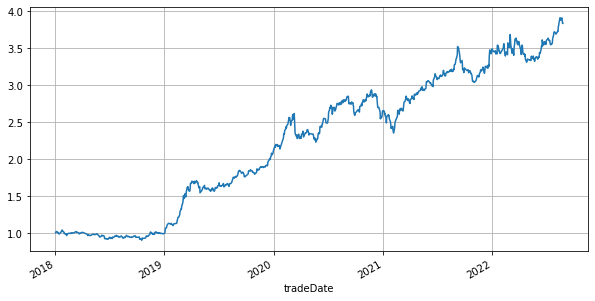

In [18]:
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

In [19]:
maxdd = lambda pnl: (1-(1+pnl).cumprod()/(1+pnl).cumprod().expanding().max()).max()
sharpe=lambda pnl:(pnl.mean() / pnl.std()) * (243**0.5)
gain_total=lambda pnl:(1+pnl).prod()-1
gain_yearly=lambda pnl:(1+pnl).prod()**(243/len(pnl))-1
calmar=lambda pnl:gain_yearly(pnl)/maxdd(pnl)

l=[]
d={ '总收益':gain_total(pnl),
    '年化收益':gain_yearly(pnl),
    '最大回撤':maxdd(pnl),
    '夏普率':sharpe(pnl),
    '卡玛率':calmar(pnl),
    '当年收益':gain_total(pnl['2022':]),
    '当年最大回撤':maxdd(pnl['2022':]),}
l.append(d)
result=pd.DataFrame(l)
result

,总收益,年化收益,最大回撤,夏普率,卡玛率,当年收益,当年最大回撤
0,2.834706,0.335144,0.198306,1.808033,1.690036,0.098707,0.101446


<AxesSubplot:xlabel='tradeDate'>

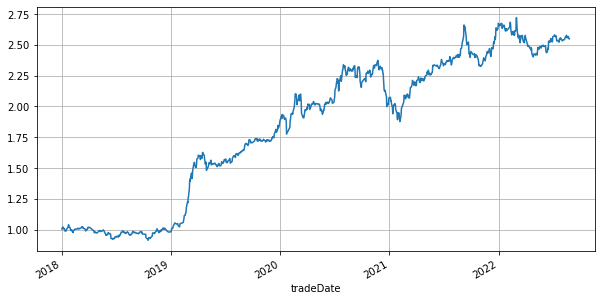

In [20]:
factor=premRankdf+priceRankdf
signal=factor.apply(selectTopN,axis=1)
pnl=(signal*day_return).sum(axis=1)/N
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

In [21]:
maxdd = lambda pnl: (1-(1+pnl).cumprod()/(1+pnl).cumprod().expanding().max()).max()
sharpe=lambda pnl:(pnl.mean() / pnl.std()) * (243**0.5)
gain_total=lambda pnl:(1+pnl).prod()-1
gain_yearly=lambda pnl:(1+pnl).prod()**(243/len(pnl))-1
calmar=lambda pnl:gain_yearly(pnl)/maxdd(pnl)

l=[]
d={ '总收益':gain_total(pnl),
    '年化收益':gain_yearly(pnl),
    '最大回撤':maxdd(pnl),
    '夏普率':sharpe(pnl),
    '卡玛率':calmar(pnl),
    '当年收益':gain_total(pnl['2022':]),
    '当年最大回撤':maxdd(pnl['2022':]),}
l.append(d)
result=pd.DataFrame(l)
result

,总收益,年化收益,最大回撤,夏普率,卡玛率,当年收益,当年最大回撤
0,1.548722,0.222862,0.209009,1.439364,1.06628,-0.047057,0.116844


In [23]:
def rank2csv():
    priceRankdf.to_pickle(priceRankfilename)
    premRankdf.to_pickle(premRankfilename)
    sizeRankdf.to_pickle(sizeRankfilename)
    return
rank2csv()